# Data Science Intern at LetsGrowMore

# Author:Madhuri Prasad

# TASK-02 --Exploratory Data Analysis on Dataset - Terrorism 

# Dataset link:  https://bit.ly/2TK5Xn5

# Importing the necessary package

In [143]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline

   Importing the data 

In [144]:

data =pd.read_csv("globalterrorismdb_0718dist.csv",encoding='latin1')
print("imported successfully")

C:\Users\maduri pc\AppData\Local\Programs\Python\Python39\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


imported successfully


In [145]:
data.head()  # used for getting the  top 5 values

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [146]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [147]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','gname':'Group','country_txt':'Country','attacktype1_txt':'Attacktype',
                     'target1':'Target','nkill':'Killed',
                    'nwound':'Wounded',  'targtype1_txt':'Target_Type',  'weaptype1_txt':'Weapon_type',  'motive':'Motive',
                      'latitude':'Latitude', 'extended':'Extended', 'longitude':'Longitude','city':'City', 
                     'summary':'Summary','region_txt':'Region' },inplace=True)

In [148]:
data=data[['Year','Month','Day','Group','Country','Attacktype',  'Target','Killed',
                    'Wounded',  'Target_Type', 'Weapon_type', 'Motive',
                     'Latitude', 'Extended','Longitude','City', 
                     'Summary','Region']]

In [149]:
data.head()

,Year,Month,Day,Group,Country,Attacktype,Target,Killed,Wounded,Target_Type,Weapon_type,Motive,Latitude,Extended,Longitude,City,Summary,Region
0,1970,7,2,MANO-D,Dominican Republic,Assassination,Julio Guzman,1.0,0.0,Private Citizens & Property,Unknown,NaN,18.456792,0,-69.951164,Santo Domingo,NaN,Central America & Caribbean
1,1970,0,0,23rd of September Communist League,Mexico,Hostage Taking (Kidnapping),"Nadine Chaval, daughter",0.0,0.0,Government (Diplomatic),Unknown,NaN,19.371887,0,-99.086624,Mexico city,NaN,North America
2,1970,1,0,Unknown,Philippines,Assassination,Employee,1.0,0.0,Journalists & Media,Unknown,NaN,15.478598,0,120.599741,Unknown,NaN,Southeast Asia
3,1970,1,0,Unknown,Greece,Bombing/Explosion,U.S. Embassy,NaN,NaN,Government (Diplomatic),Explosives,NaN,37.997490,0,23.762728,Athens,NaN,Western Europe
4,1970,1,0,Unknown,Japan,Facility/Infrastructure Attack,U.S. Consulate,NaN,NaN,Government (Diplomatic),Incendiary,NaN,33.580412,0,130.396361,Fukouka,NaN,East Asia


# Exploring the Data and analysing

In [150]:
data.shape     #Returns size of dataframe/series which is equivalent to total number of elements like (rows,columns).

(181691, 18)

In [151]:
data.keys()

Index(['Year', 'Month', 'Day', 'Group', 'Country', 'Attacktype', 'Target',
       'Killed', 'Wounded', 'Target_Type', 'Weapon_type', 'Motive', 'Latitude',
       'Extended', 'Longitude', 'City', 'Summary', 'Region'],
      dtype='object')

In [152]:
data['Killed']=data['Killed'].fillna(0)
data['Wounded']=data['Wounded'].fillna(0)
data['Casualties']=data['Killed']+data['Wounded']

In [153]:
data.describe()   #It analyzes both numeric and object series and also the DataFrame column sets of mixed data types.

,Year,Month,Day,Killed,Wounded,Latitude,Extended,Longitude,Casualties
count,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,181691.000000,1.771340e+05,181691.000000
mean,2002.638997,6.467277,15.505644,2.266860,2.883296,23.498343,0.045346,-4.586957e+02,5.150156
std,13.259430,3.388303,8.814045,11.227057,34.309747,18.569242,0.208063,2.047790e+05,40.555416
min,1970.000000,0.000000,0.000000,0.000000,0.000000,-53.154613,0.000000,-8.618590e+07,0.000000
25%,1991.000000,4.000000,8.000000,0.000000,0.000000,11.510046,0.000000,4.545640e+00,0.000000
50%,2009.000000,6.000000,15.000000,0.000000,0.000000,31.467463,0.000000,4.324651e+01,1.000000
75%,2014.000000,9.000000,23.000000,2.000000,2.000000,34.685087,0.000000,6.871033e+01,4.000000
max,2017.000000,12.000000,31.000000,1570.000000,8191.000000,74.633553,1.000000,1.793667e+02,9574.000000


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Year         181691 non-null  int64  
 1   Month        181691 non-null  int64  
 2   Day          181691 non-null  int64  
 3   Group        181691 non-null  object 
 4   Country      181691 non-null  object 
 5   Attacktype   181691 non-null  object 
 6   Target       181055 non-null  object 
 7   Killed       181691 non-null  float64
 8   Wounded      181691 non-null  float64
 9   Target_Type  181691 non-null  object 
 10  Weapon_type  181691 non-null  object 
 11  Motive       50561 non-null   object 
 12  Latitude     177135 non-null  float64
 13  Extended     181691 non-null  int64  
 14  Longitude    177134 non-null  float64
 15  City         181257 non-null  object 
 16  Summary      115562 non-null  object 
 17  Region       181691 non-null  object 
 18  Casualties   181691 non-

In [155]:
data.isnull().sum() # concluding that none of the data is null.

Year                0
Month               0
Day                 0
Group               0
Country             0
Attacktype          0
Target            636
Killed              0
Wounded             0
Target_Type         0
Weapon_type         0
Motive         131130
Latitude         4556
Extended            0
Longitude        4557
City              434
Summary         66129
Region              0
Casualties          0
dtype: int64

# Visualizing the data

# 1.Year wise attacks  data:

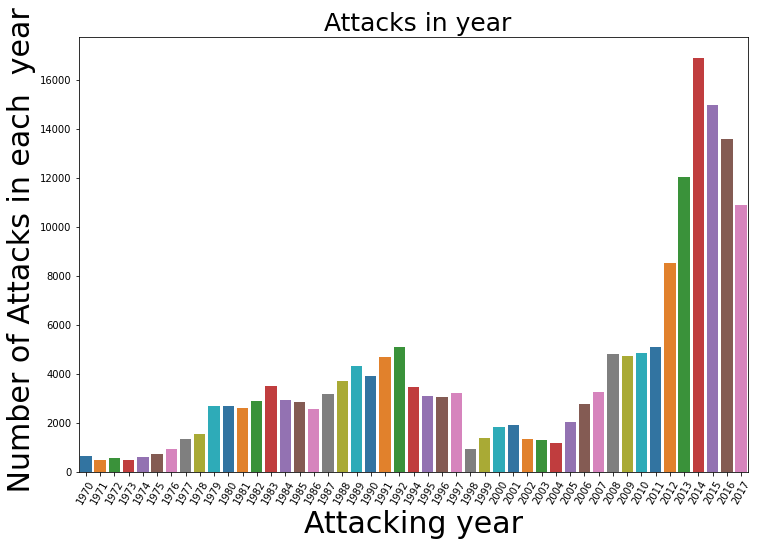

In [156]:
year=data['Year'].unique()
years_count=data['Year'].value_counts(dropna=False).sort_index()
plt.figure(figsize=(12,8))
sns.barplot(x=year,y=years_count,palette='tab10')
plt.xticks(rotation=60)
plt.xlabel("Attacking year",fontsize=30)
plt.ylabel(" Number of Attacks in each  year",fontsize=30)
plt.title(" Attacks in year",fontsize=25)
plt.show()



 From above graph we can see that :
        1)The most number of attacks was 16000  in the year of 2014.
        while least number of attacks was in the year 1973.
    
    

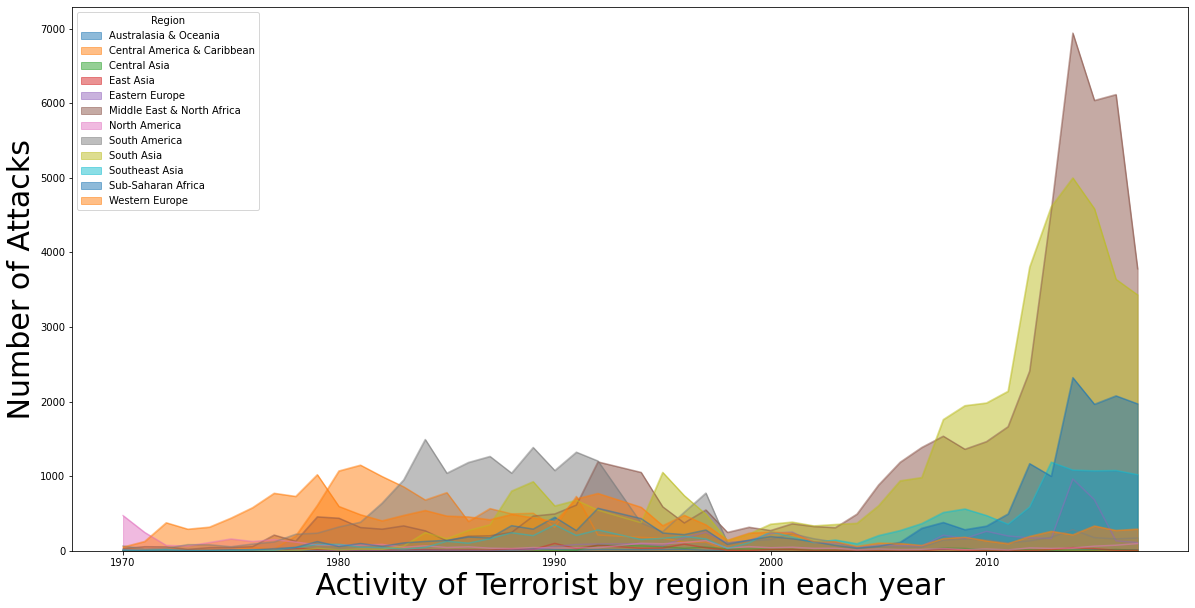

In [157]:
pd.crosstab(data.Year,data.Region).plot(kind='area',stacked=False,figsize=(20,10))
plt.xlabel(" Activity of Terrorist by region in each year ",fontsize=30)
plt.ylabel(" Number of Attacks ",fontsize=30)
plt.show()

                                    

<AxesSubplot:>

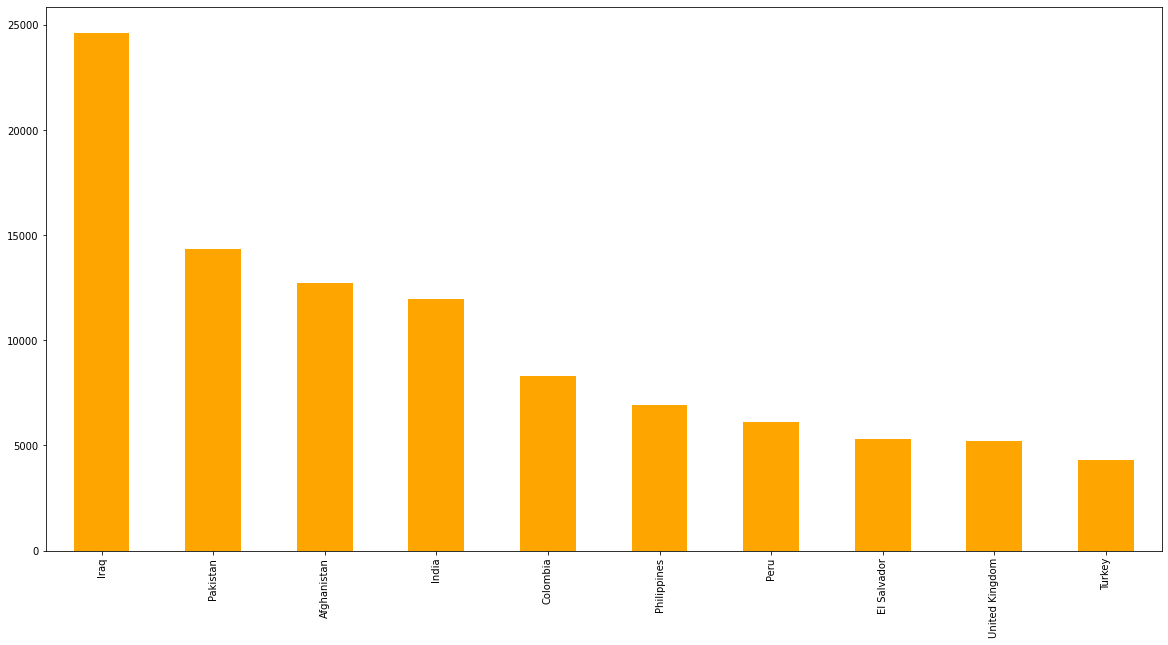

In [158]:
attack.plot(kind='bar',color='orange',stacked=False,figsize=(20,10))

In [159]:
attack=data.Country.value_counts()[:10]
attack

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Country, dtype: int64

In [160]:
data.Group.value_counts()[:10]

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Name: Group, dtype: int64

In [161]:
sc=data[['Year','Killed']].groupby('Year').sum()
sc.head()

,Killed
Year,
1970,174.0
1971,173.0
1972,566.0
1973,370.0
1974,539.0


Here we can see the no. of  people got killed in particular year

# 2.Region wise Attacks

In [162]:
r=pd.crosstab(data.Year,data.Region)
r.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


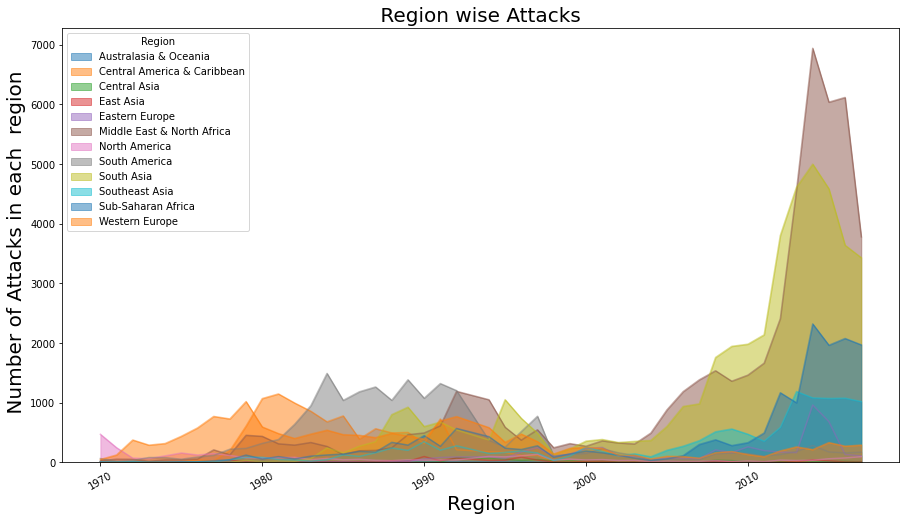

In [163]:
r.plot(kind='area',stacked=False,figsize=(15,8))
plt.xticks(rotation=30)
plt.xlabel("Region",fontsize=20)
plt.ylabel(" Number of Attacks in each  region",fontsize=20)
plt.title(" Region wise Attacks ",fontsize=20)
plt.show()


In [164]:
r=data[['Region','Casualties']].groupby('Region').sum().sort_values(by='Casualties',ascending=False)
r

,Casualties
Region,
Middle East & North Africa,351950.0
South Asia,242679.0
Sub-Saharan Africa,131243.0
South America,45553.0
Southeast Asia,41896.0
Central America & Caribbean,37699.0
North America,26447.0
Western Europe,25026.0
Eastern Europe,19460.0


In [165]:
r=data[['Region','Killed']].groupby('Region').sum().sort_values(by='Killed',ascending=False)
r

,Killed
Region,
Middle East & North Africa,137642.0
South Asia,101319.0
Sub-Saharan Africa,78386.0
South America,28849.0
Central America & Caribbean,28708.0
Southeast Asia,15637.0
Eastern Europe,7415.0
Western Europe,6694.0
North America,4916.0


In [166]:
r=data[['Region','Wounded']].groupby('Region').sum().sort_values(by='Wounded',ascending=False)
r

,Wounded
Region,
Middle East & North Africa,214308.0
South Asia,141360.0
Sub-Saharan Africa,52857.0
Southeast Asia,26259.0
North America,21531.0
Western Europe,18332.0
South America,16704.0
Eastern Europe,12045.0
East Asia,9213.0


# 3.Country wise attacks

In [167]:
c=data["Country"].value_counts().head(20)
c

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Sri Lanka          3022
United States      2836
Algeria            2743
France             2693
Egypt              2479
Name: Country, dtype: int64

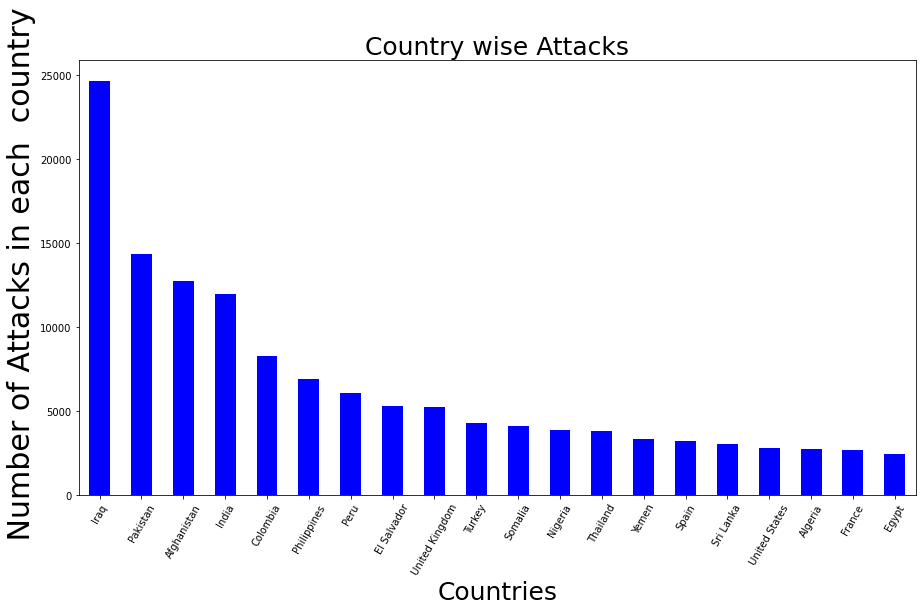

In [168]:
c.plot(kind='bar',color='blue',figsize=(15,8))
plt.xticks(rotation=60)
plt.xlabel("Countries",fontsize=25)
plt.ylabel(" Number of Attacks in each  country",fontsize=30)
plt.title(" Country wise Attacks ",fontsize=25)
plt.show()


In [169]:
c=data[['Country','Casualties']].groupby('Country').sum().sort_values(by='Country',ascending=False)
c

,Casualties
Country,
Zimbabwe,376.0
Zambia,132.0
Zaire,535.0
Yugoslavia,400.0
Yemen,18104.0
...,...
Angola,5498.0
Andorra,0.0
Algeria,20216.0


In [170]:
c=data[['Country','Killed']].groupby('Country').sum().sort_values(by='Country',ascending=False)
c

,Killed
Country,
Zimbabwe,154.0
Zambia,70.0
Zaire,324.0
Yugoslavia,119.0
Yemen,8776.0
...,...
Angola,3043.0
Andorra,0.0
Algeria,11066.0


In [171]:
c=data[['Country','Wounded']].groupby('Country').sum().sort_values(by='Country',ascending=False)
c

,Wounded
Country,
Zimbabwe,222.0
Zambia,62.0
Zaire,211.0
Yugoslavia,281.0
Yemen,9328.0
...,...
Angola,2455.0
Andorra,0.0
Algeria,9150.0


# 4.City Wise Attacks

In [172]:
ct=data["City"].value_counts().head(17)
ct

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Benghazi         840
Peshawar         819
Name: City, dtype: int64

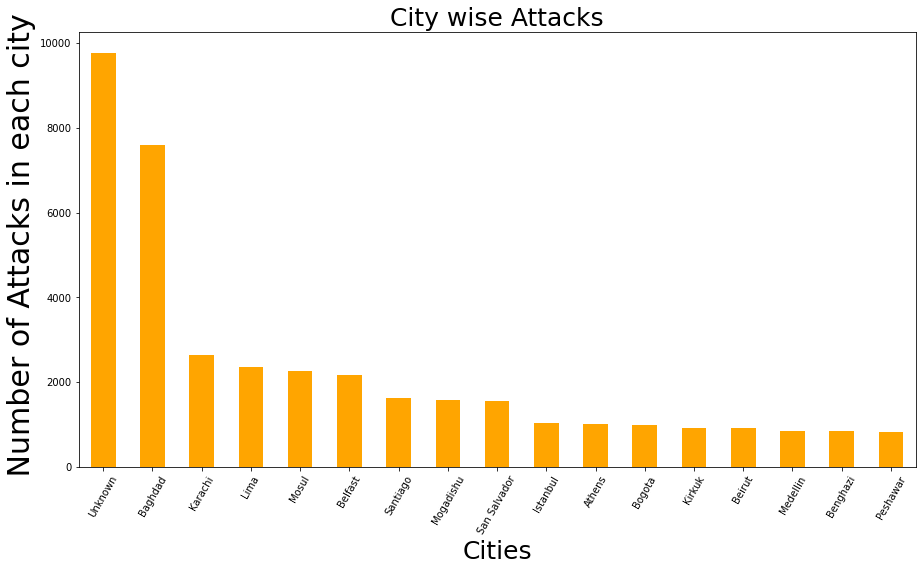

In [173]:
ct.plot(kind='bar',color='orange',figsize=(15,8))
plt.xticks(rotation=60)
plt.xlabel("Cities",fontsize=25)
plt.ylabel(" Number of Attacks in each city",fontsize=30)
plt.title(" City wise Attacks ",fontsize=25)
plt.show()


In [174]:
ct=data[['City','Casualties']].groupby('City').sum().sort_values(by='Casualties',ascending=False)
ct

,Casualties
City,
Baghdad,77876.0
Unknown,35450.0
New York City,19619.0
Mosul,12927.0
Karachi,9376.0
...,...
Divandarreh,0.0
Diva,0.0
Padaiya,0.0


We can see here baghdad has highest no of casualties.

In [175]:
ct=data[['City','Killed']].groupby('City').sum().sort_values(by='Killed',ascending=False)
ct

,Killed
City,
Unknown,22647.0
Baghdad,21151.0
Mosul,7140.0
Mogadishu,3913.0
Karachi,3688.0
...,...
Mohib Banda,0.0
Mohill,0.0
Chapai Nawabganj,0.0


In [176]:
ct=data[['City','Wounded']].groupby('City').sum().sort_values(by='Wounded',ascending=False)
ct

,Wounded
City,
Baghdad,56725.0
New York City,16781.0
Unknown,12803.0
Kabul,5973.0
Mosul,5787.0
...,...
Kalaong,0.0
Kalantra,0.0
Kalangar,0.0


# Some more information about attacks

In [179]:
attack=pd.DataFrame(data["Attacktype"].value_counts())
attack

,Attacktype
Bombing/Explosion,88255
Armed Assault,42669
Assassination,19312
Hostage Taking (Kidnapping),11158
Facility/Infrastructure Attack,10356
Unknown,7276
Unarmed Assault,1015
Hostage Taking (Barricade Incident),991
Hijacking,659


In [180]:
attack=pd.DataFrame(data["Target_Type"].value_counts())
attack

,Target_Type
Private Citizens & Property,43511
Military,27984
Police,24506
Government (General),21283
Business,20669
Transportation,6799
Utilities,6023
Unknown,5898
Religious Figures/Institutions,4440
Educational Institution,4322


In [181]:
attack=pd.DataFrame(data["Weapon_type"].value_counts())
attack

,Weapon_type
Explosives,92426
Firearms,58524
Unknown,15157
Incendiary,11135
Melee,3655
Chemical,321
Sabotage Equipment,141
"Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)",136
Other,114
Biological,35


# Observations:-